In [84]:
import joblib
import nibabel as nib
import numpy as np
import pandas as pd
from os.path import exists
import seaborn as sns

atlas_img = nib.load('cortex_Harvard_Oxford_orig_atlas.nii.gz')
atlas_data = atlas_img.get_fdata()
atlas_csv = 'Harvard_Oxford.csv'
atlas_df = pd.read_csv(atlas_csv)

In [85]:
def extract_features(img_name):
    
    features_ = pd.DataFrame(columns=['Inferior_Temporal_Gyrus_anterior_division',
                                     'Intracalcarine_Cortex',
                                     'Supracalcarine_Cortex'])
    
    features_indexes = [14,24,47]

    if exists(img_name):
        img = nib.load(img_name)
        data = img.get_fdata()
        
        where_roi = np.where(atlas_data == 14)
        features_.loc[1,'Inferior_Temporal_Gyrus_anterior_division'] = data[where_roi].mean()
        where_roi = np.where(atlas_data == 24)
        features_.loc[1,'Intracalcarine_Cortex'] = data[where_roi].mean()
        where_roi = np.where(atlas_data == 47)
        features_.loc[1,'Supracalcarine_Cortex'] = data[where_roi].mean()

    
    return features_

In [86]:
def explain(features_values):
    
    from matplotlib import pyplot as plt

    f, ax = plt.subplots(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    
    df = pd.read_csv('training_features.csv')
    sns.boxplot(x='GRUPO',y='Inferior_Temporal_Gyrus_anterior_division',data=df)
    sns.scatterplot(x='GRUPO',y='Inferior_Temporal_Gyrus_anterior_division',data=features_values,color='red')

    plt.subplot(1, 3, 2)

    sns.boxplot(x='GRUPO',y='Intracalcarine_Cortex',data=df)
    sns.scatterplot(x='GRUPO',y='Intracalcarine_Cortex',data=features_values,color='red')

    plt.subplot(1, 3, 3)

    sns.boxplot(x='GRUPO',y='Supracalcarine_Cortex',data=df)
    sns.scatterplot(x='GRUPO',y='Supracalcarine_Cortex',data=features_values,color='red')

    #sns.scatterplot(x=)

In [87]:
def inference(features_values):
    
    model = joblib.load('my_model.pkl')
    y_pred = model.predict(features_values)
    #return y_pred


    if y_pred[0] == 'pure-AD':
        print('El paciente tiene una imagen sugestiva de enfermedad de Alzheimer')
        
    return y_pred[0]

El paciente tiene una imagen sugestiva de enfermedad de Alzheimer


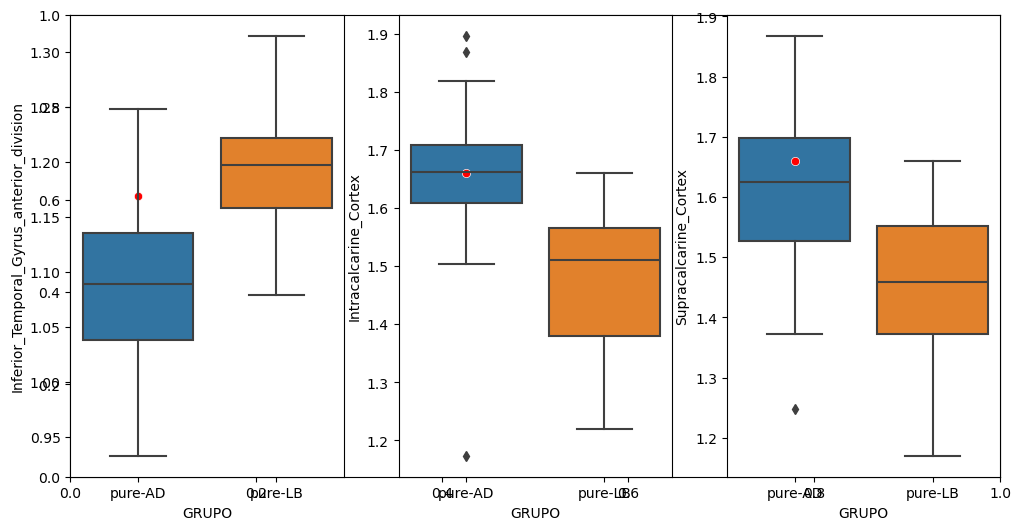

In [88]:
img = '/Users/jsilva/data/MIA/Autopsia/011_S_0008_I26885/swfdg_normhist.hdr'

features_values = extract_features(img)

y_pred = inference(features_values)
features_values.loc[1,'GRUPO'] = y_pred

explain(features_values)